In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import missingno as msno 


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data = pd.read_csv("spanish-cities-energy-consumption/energy_dataset.csv")
data.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


Missing values in the dataset: 70529
Outliers in the data set:
Unique values in column time : ['2015-01-01 00:00:00+01:00' '2015-01-01 01:00:00+01:00'
 '2015-01-01 02:00:00+01:00' ... '2018-12-31 21:00:00+01:00'
 '2018-12-31 22:00:00+01:00' '2018-12-31 23:00:00+01:00']
Boxplot for column generation biomass


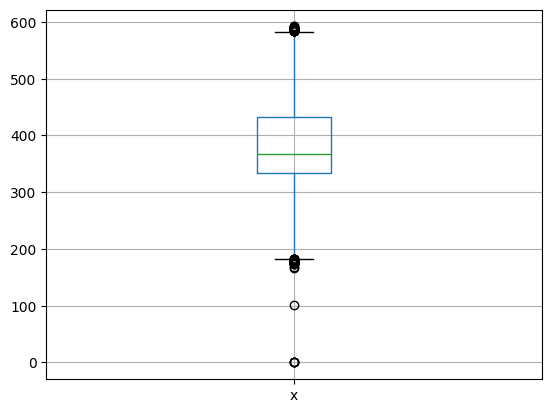

Boxplot for column generation fossil brown coal/lignite


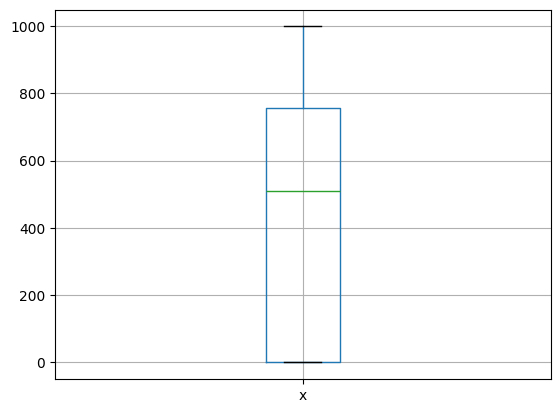

Boxplot for column generation fossil coal-derived gas


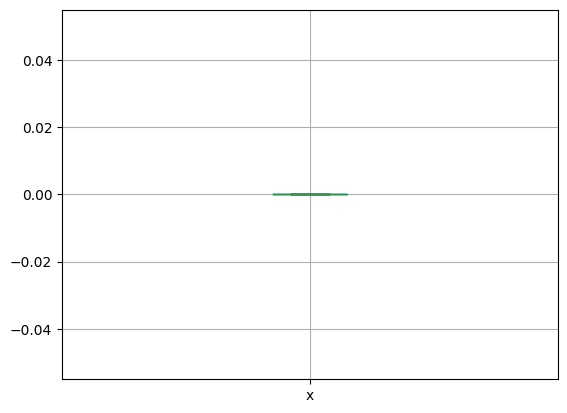

Boxplot for column generation fossil gas


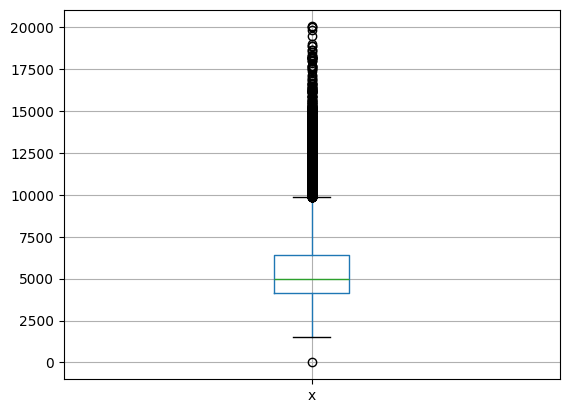

Boxplot for column generation fossil hard coal


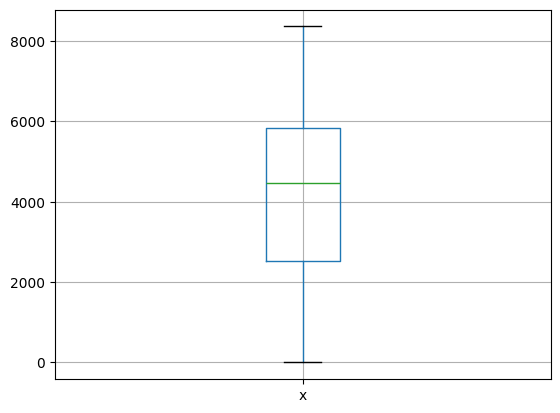

Boxplot for column generation fossil oil


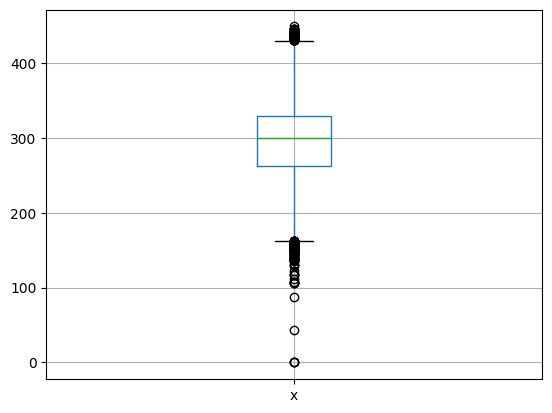

Boxplot for column generation fossil oil shale


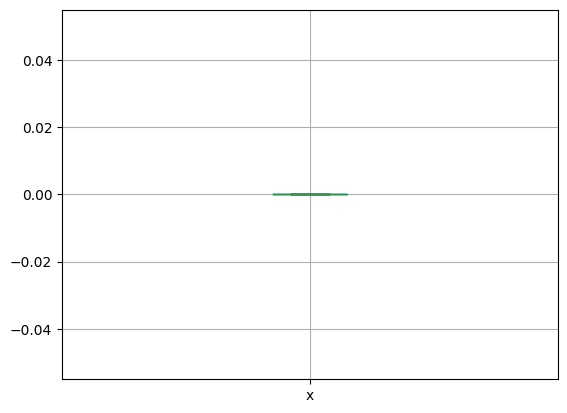

Boxplot for column generation fossil peat


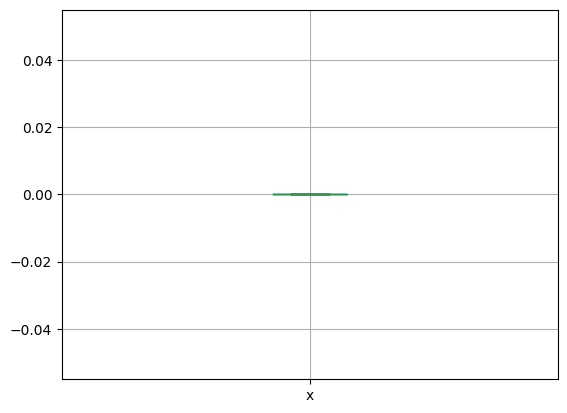

Boxplot for column generation geothermal


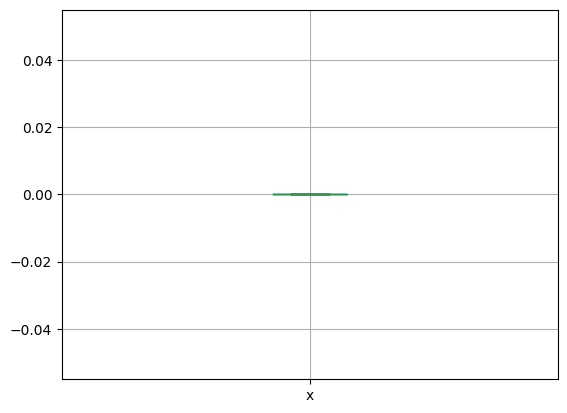

Boxplot for column generation hydro pumped storage aggregated


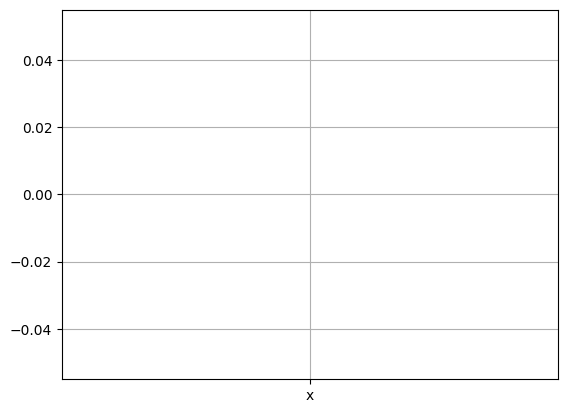

Boxplot for column generation hydro pumped storage consumption


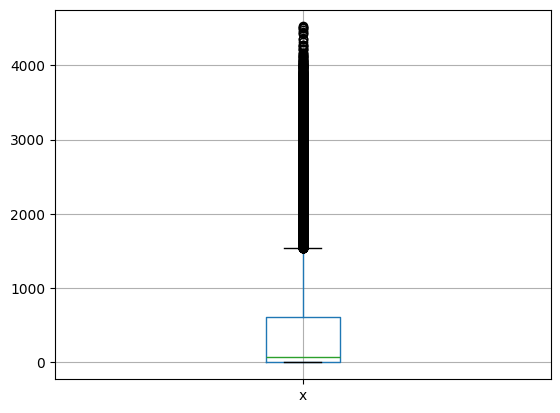

Boxplot for column generation hydro run-of-river and poundage


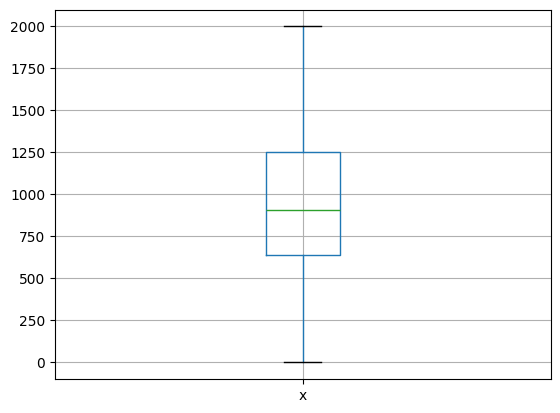

Boxplot for column generation hydro water reservoir


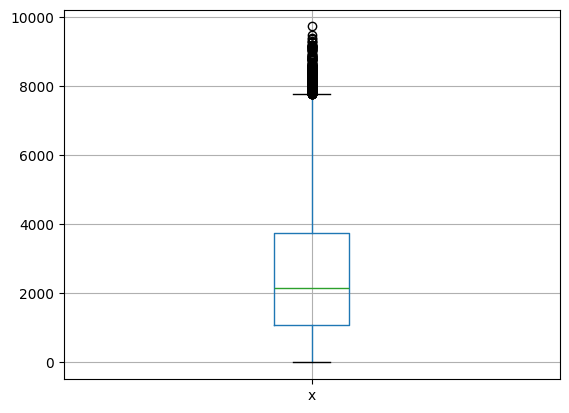

Boxplot for column generation marine


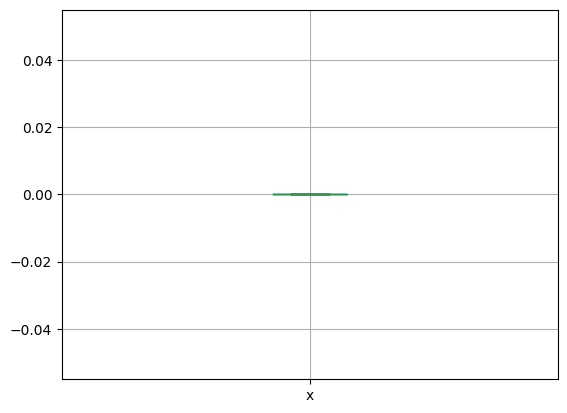

Boxplot for column generation nuclear


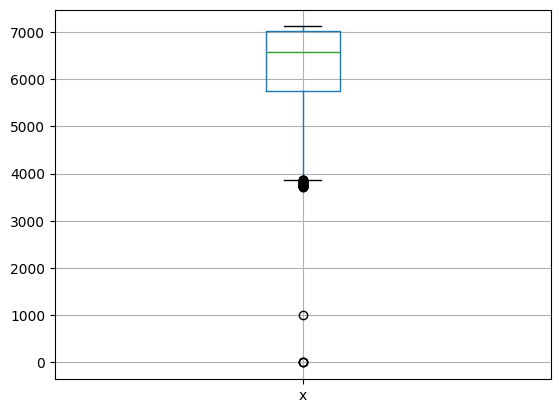

Boxplot for column generation other


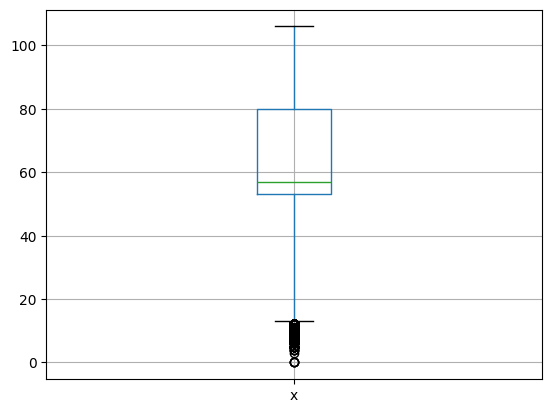

Boxplot for column generation other renewable


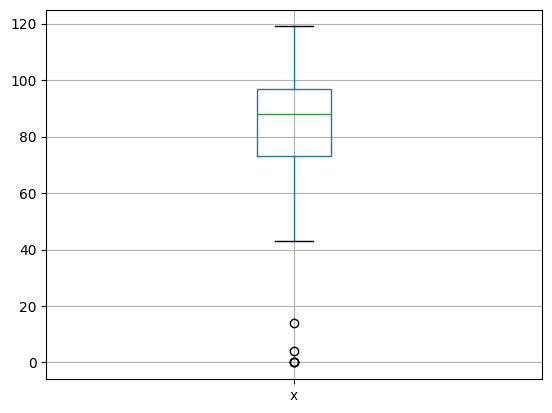

Boxplot for column generation solar


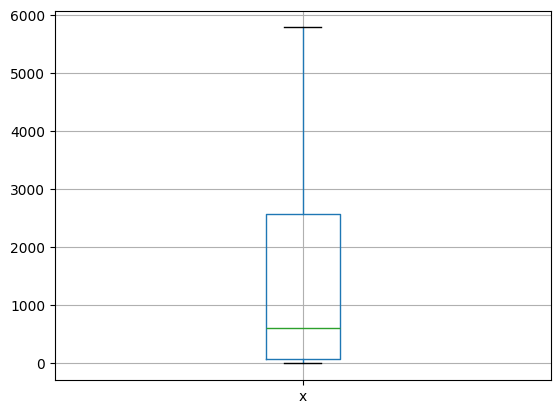

Boxplot for column generation waste


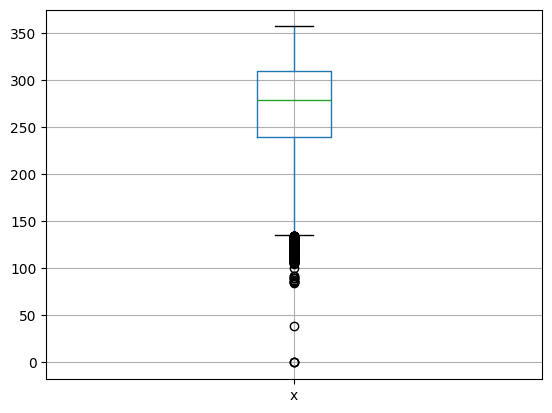

Boxplot for column generation wind offshore


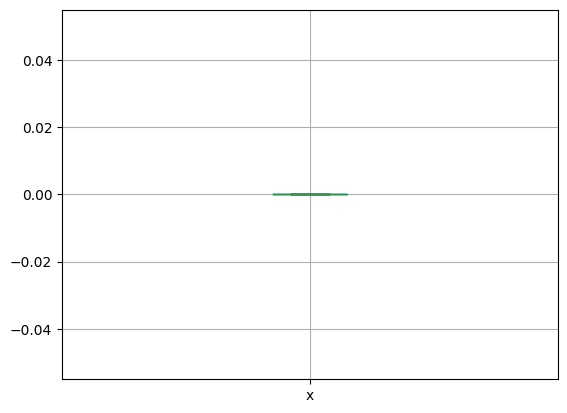

Boxplot for column generation wind onshore


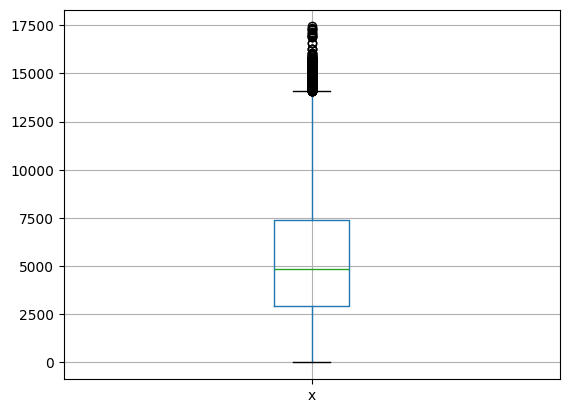

Boxplot for column forecast solar day ahead


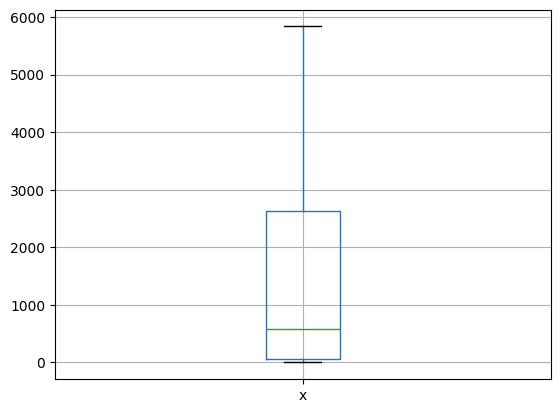

Boxplot for column forecast wind offshore eday ahead


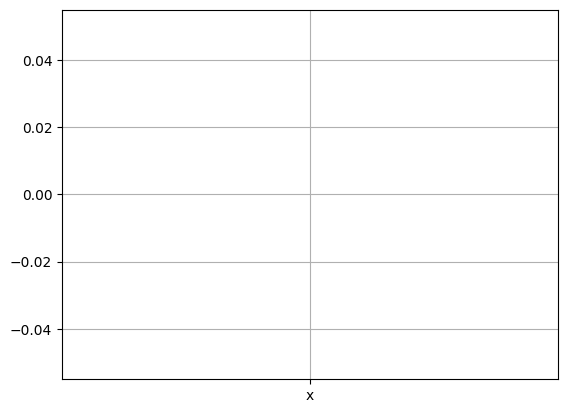

Boxplot for column forecast wind onshore day ahead


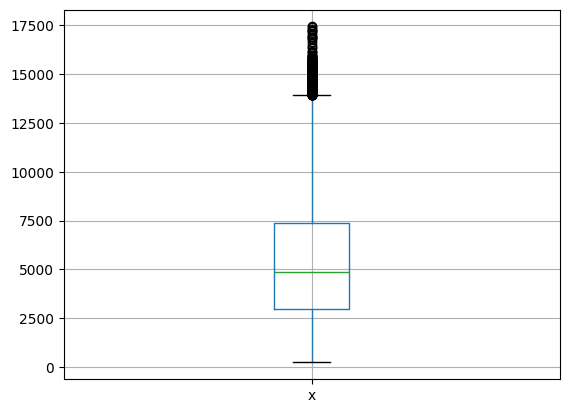

Boxplot for column total load forecast


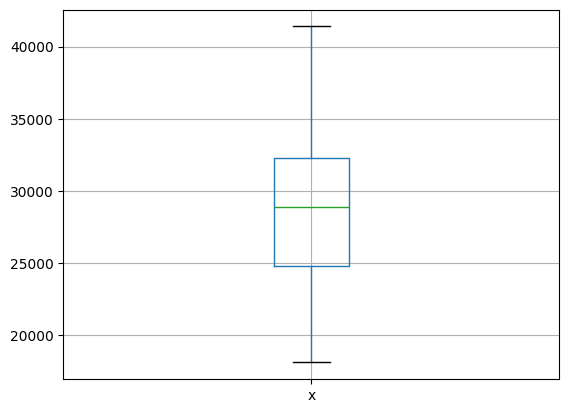

Boxplot for column total load actual


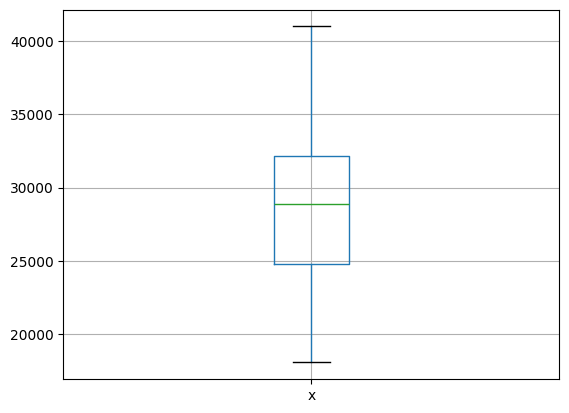

Boxplot for column price day ahead


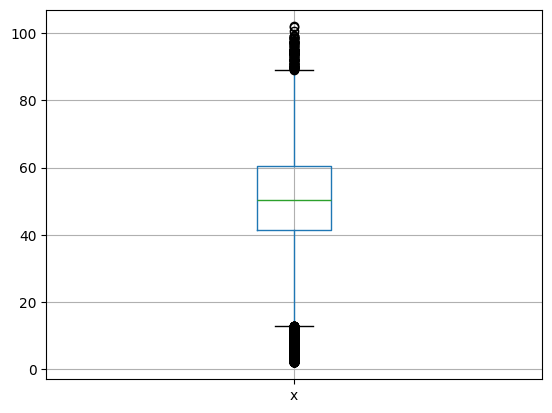

Boxplot for column price actual


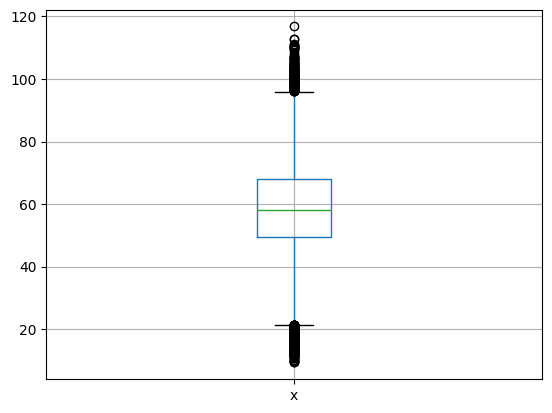

In [18]:
print("Missing values in the dataset:", pd.isnull(data).sum().sum())

print("Outliers in the data set:")

for col in data.columns.values:
    if data[col].dtype == "object":
        print("Unique values in column", col, ":", data[col].unique())
    
    if (data[col].dtype == "float64" or data[col].dtype == "int64"):
        print("Boxplot for column", col)
        pd.DataFrame.boxplot(data[col])
        plt.show()
        


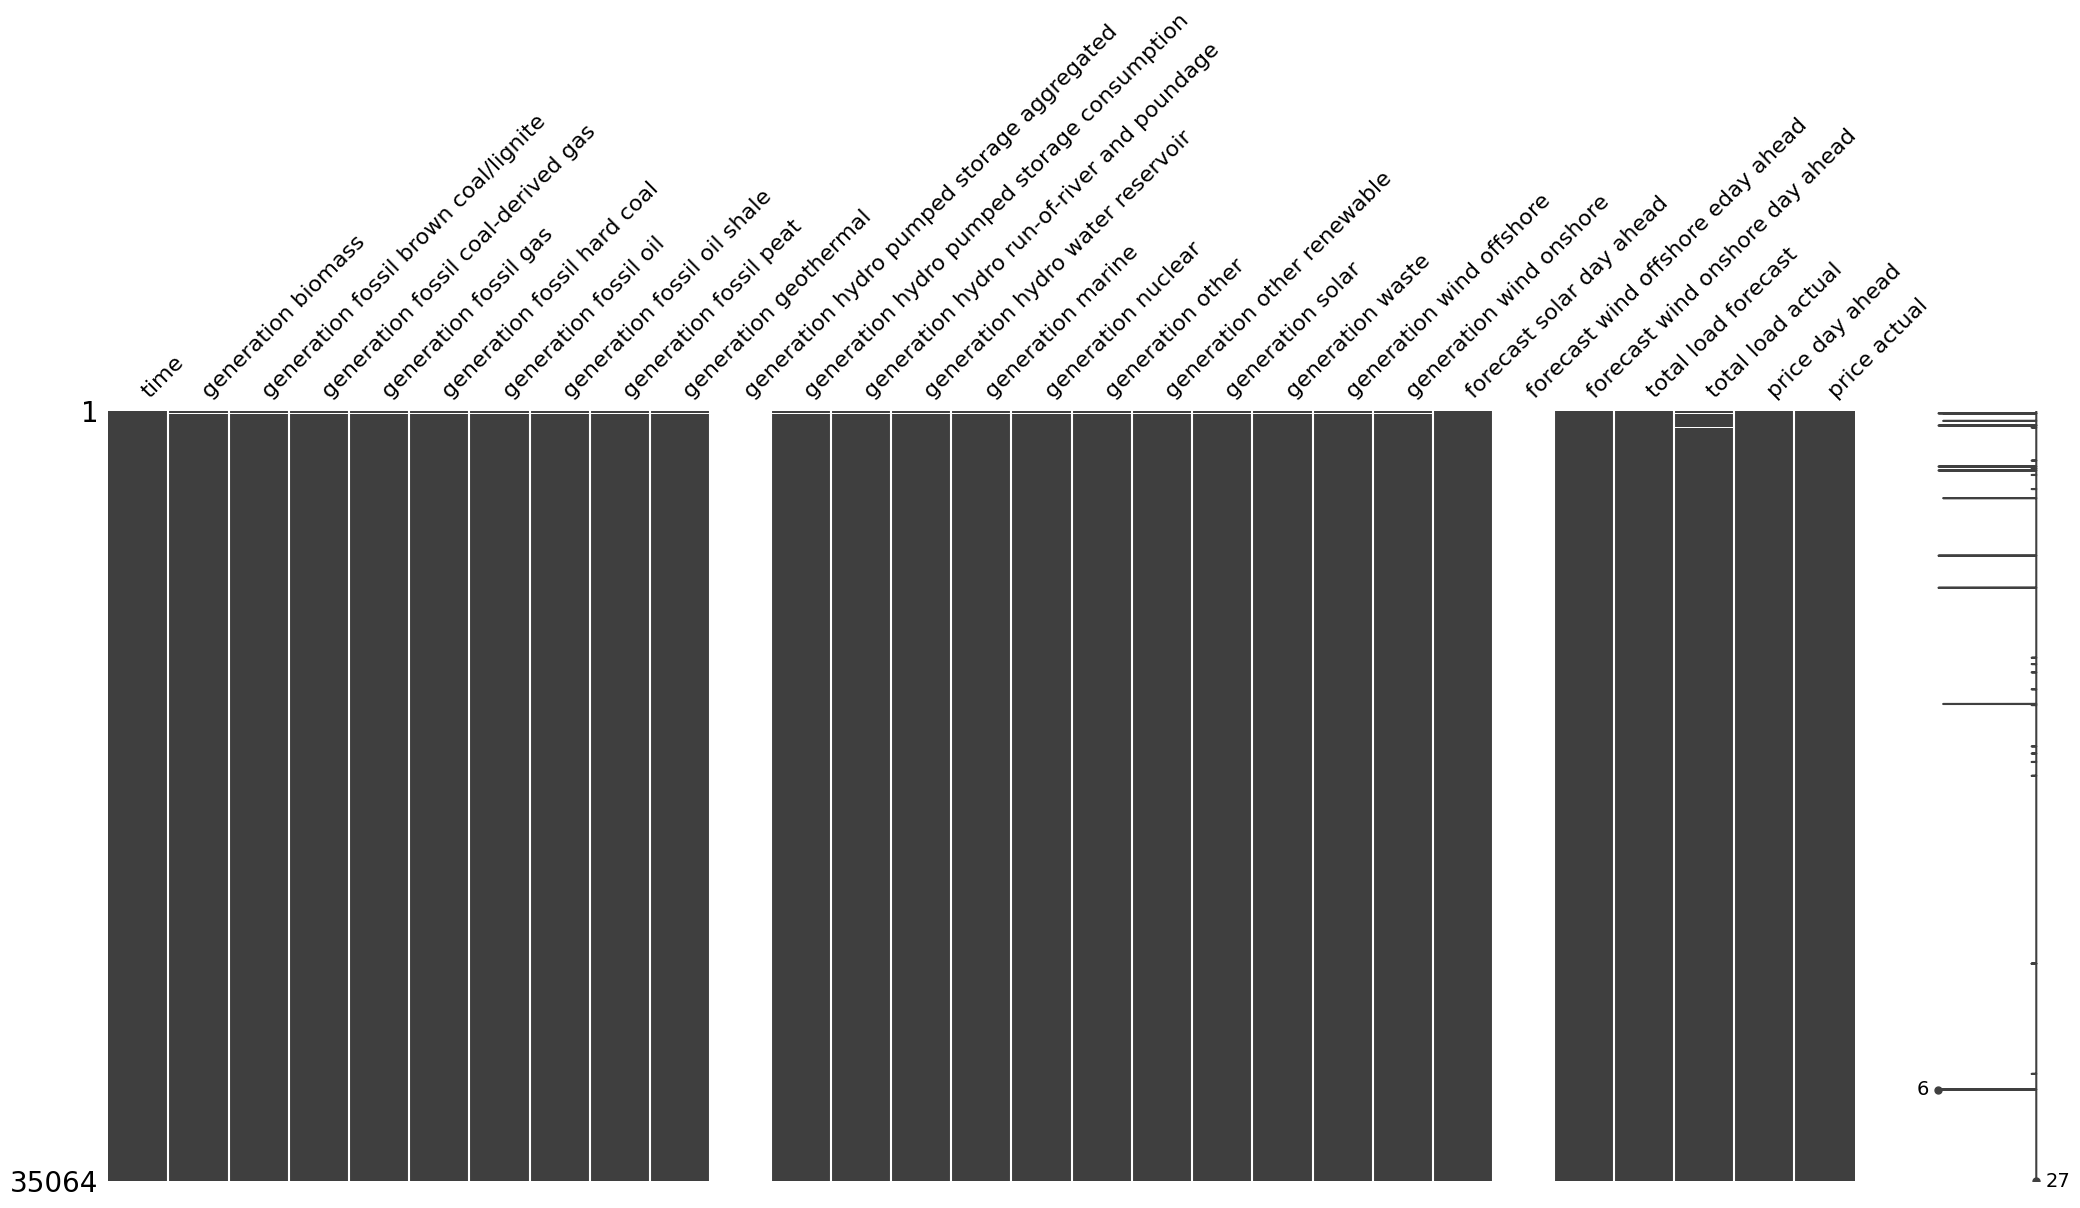

In [19]:

msno.matrix(data)
plt.show()

data.drop(columns=["generation hydro pumped storage aggregated", "forecast wind offshore eday ahead"], inplace=True)






We have chosen to delete the two columns "generation hydro pumped storage aggregated" and "forecast wind offshore eday ahead" as they both only had missing values.

In [20]:
print("Number of missing values now is:", pd.isnull(data).sum().sum())

Number of missing values now is: 401


Now we're going to perform a mean/median impution to remove the rest of the missing values, because they're numerical.

For columns where missing values might not depend on time or where the values are relatively independent between time intervals, mean imputation is appropriate

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                       0
generation wind onsh

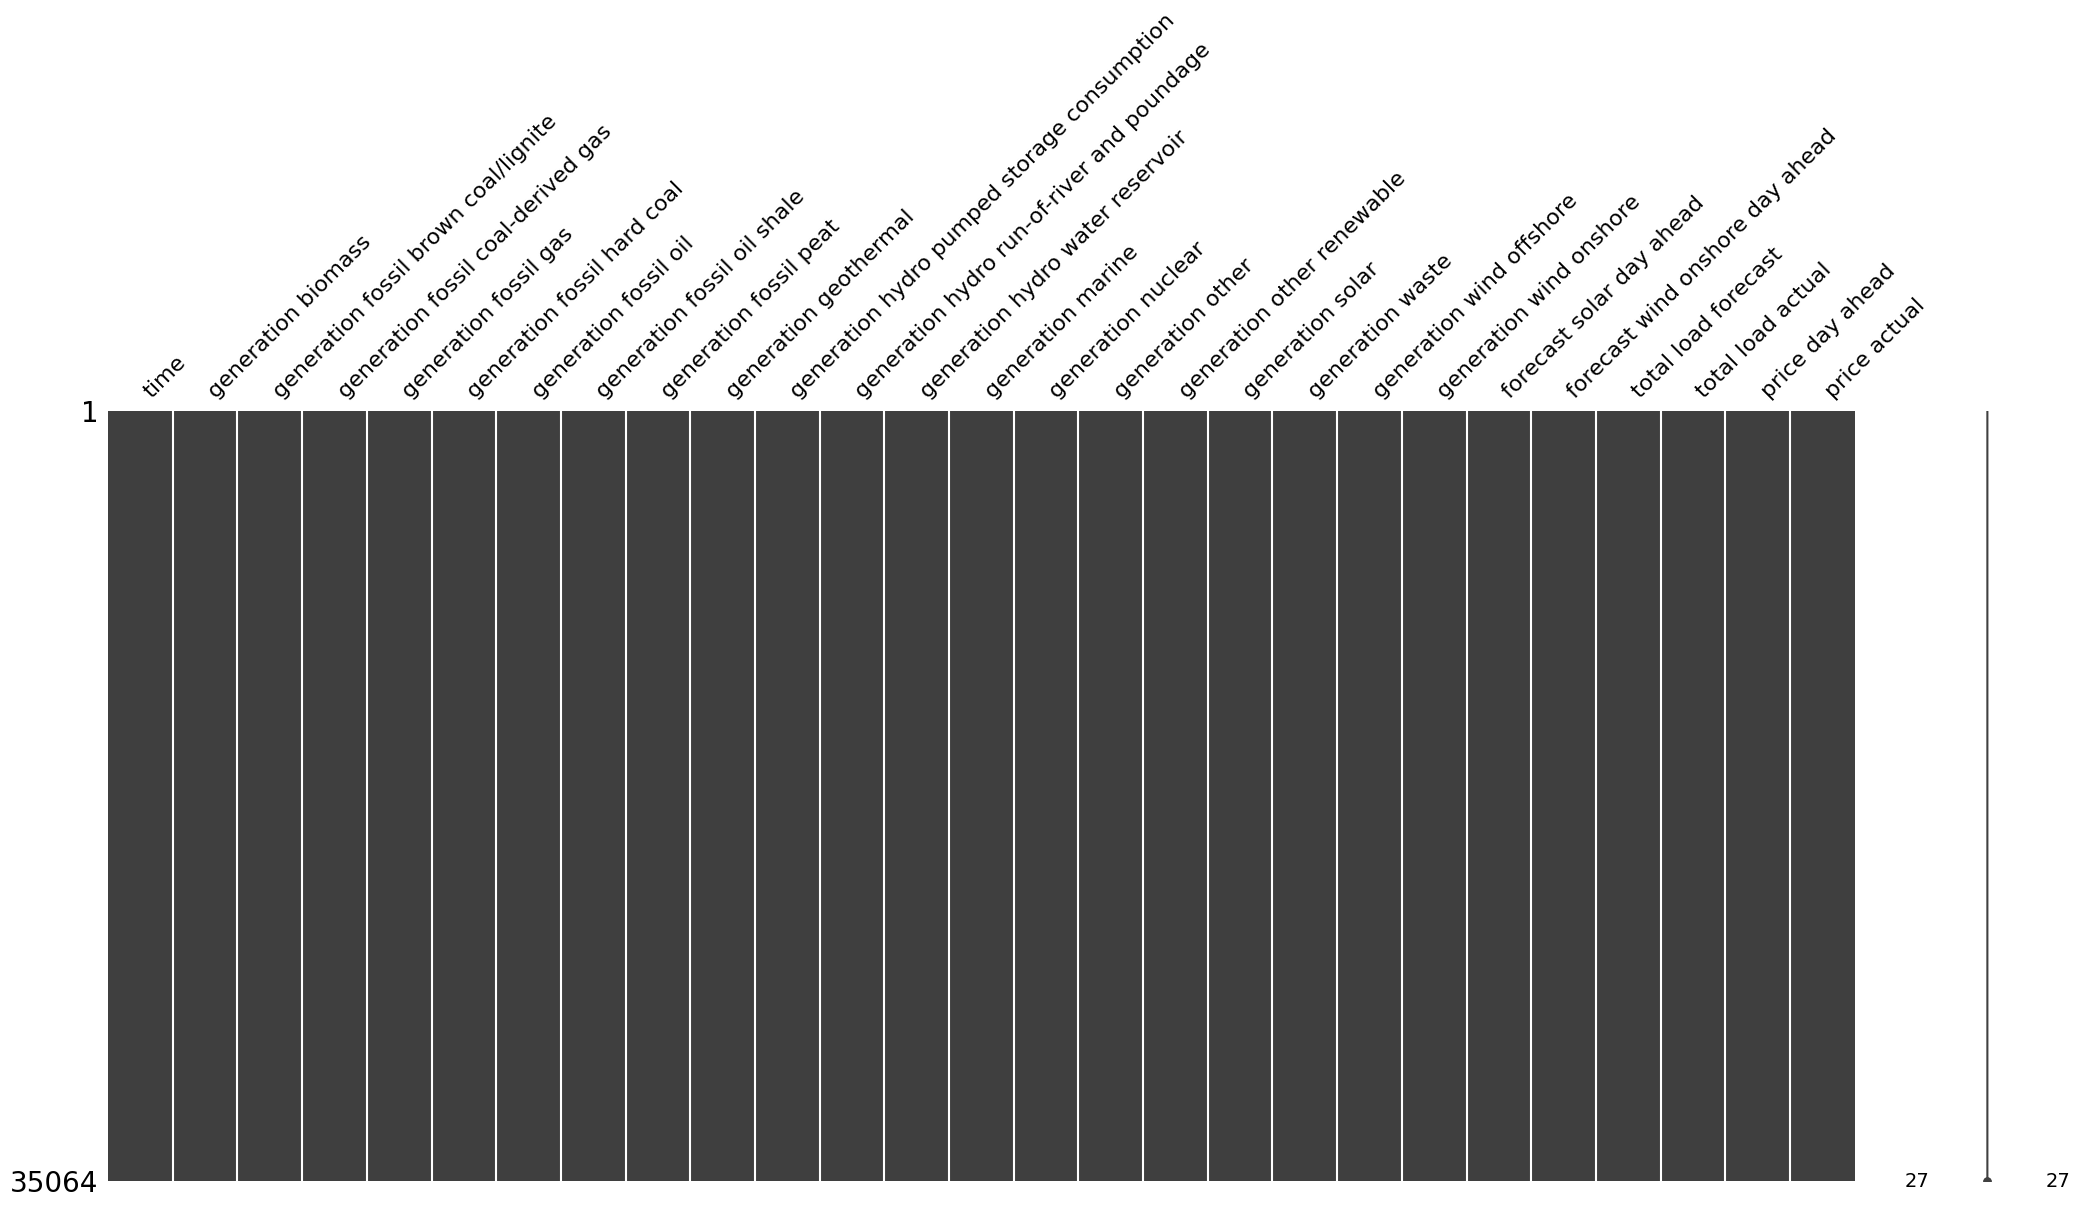

In [21]:



columns_to_mean_impute = [
'generation biomass', 
'generation fossil coal-derived gas', 
'generation fossil hard coal', 
'generation fossil oil', 
'generation fossil oil shale', 
'generation fossil peat', 
'generation geothermal', 
'generation hydro run-of-river and poundage', 
'generation marine', 
'generation other', 
'generation other renewable', 
'generation wind offshore', 
'total load actual', 
'total load forecast', 
'price day ahead', 
'price actual']  

data[columns_to_mean_impute] = data[columns_to_mean_impute].fillna(data.mean(numeric_only=True))

columns_to_median_impute = [
    'generation fossil brown coal/lignite',
    'generation hydro pumped storage consumption',
    'generation fossil gas',
    'generation hydro water reservoir',
    'generation solar',
    'generation nuclear',
    'generation waste',
    'generation wind onshore',
    'forecast solar day ahead',
    'forecast wind onshore day ahead',
]

data[columns_to_median_impute] = data[columns_to_median_impute].fillna(data.median(numeric_only=True))

print(data.isna().sum())

print("Number of missing values now is:", pd.isnull(data).sum().sum())

msno.matrix(data)
plt.show()